In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
a = np.array([1,2,3,4])
rob_map = np.zeros((9,11,11), dtype = np.uint8)

rob_map[:,5,3:8] = 1
rob_map[:,3:8,5] = 1
rob_map[:,4,[4,6]] = 1
rob_map[:,6, [4, 6]] = 1
rob_map[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [151]:
def cell_decomp(r_map, d_level = 1):

    G = nx.Graph()

    depth = r_map.shape[0] // d_level
    rows = r_map.shape[1] // d_level
    cols = r_map.shape[2] // d_level

    matrix = np.zeros((depth, rows, cols), dtype=np.int8)
    

    for d in range(depth):
        for y in range(rows):
            for x in range(cols):
                if 1 in r_map[d * d_level: (1 + d) * d_level, y * d_level: (1 + y) * d_level, x * d_level: (1 + x) * d_level]:
                    matrix[d, y, x] = 1
                else:
                    G.add_node((d, y, x))


    matrix = np.pad(matrix, 1, constant_values=-1)#[1:-1]

    
    for d in range(1, depth + 1):
        for y in range(1, rows + 1):
            for x in range(1, cols + 1):
                if matrix[d, y, x] == 0:
                    for i in range(-1, 2):
                        for j in range(-1, 2):
                            for k in range(-1, 2):
                                if matrix[d+i, y+j, x+k] == 0 and not (i == j == k == 0):
                                    
                                    
                                    
                                    if ((x != x+k) or (y != y + j)) and (d != d+i):
                                        G.add_edge((d - 1, y - 1, x - 1), (d+i - 1, y+j - 1, x+k - 1), weight=1.4)
                                    else:
                                        G.add_edge((d - 1, y - 1, x - 1), (d+i - 1, y+j - 1, x+k - 1), weight=1)
    


    return G

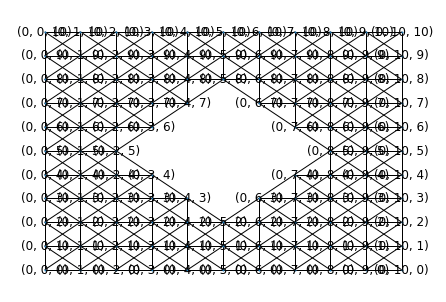

In [223]:
Gr = cell_decomp(rob_map[[0]])
pos = {}
for i in range (rob_map.shape[1]):
    for j in range (rob_map.shape[2]):
        pos[(0, i, j)] = (i, j)

#nx.dijkstra_path(Gr, (0,0,0), (8, 10, 10))
#nx.bipartite_layout(Gr, Gr.nodes())
nx.draw(Gr,pos = pos, with_labels=True, node_size=1)
#nx.draw_networkx(Gr, )

In [214]:
Gr = cell_decomp2(rob_map)
#pos = {node: node for node in np.array(Gr.nodes())[:,1:3]}
pos ={}
for i in range (1, rob_map.shape[0]+1):
    for j in range (1, rob_map.shape[1] + 1):
        pos[(i,j)] = (i,j)
#nx.draw(Gr, pos)

pos

{(1, 1): (1, 1),
 (1, 2): (1, 2),
 (1, 3): (1, 3),
 (1, 4): (1, 4),
 (1, 5): (1, 5),
 (1, 6): (1, 6),
 (1, 7): (1, 7),
 (1, 8): (1, 8),
 (1, 9): (1, 9),
 (1, 10): (1, 10),
 (1, 11): (1, 11),
 (2, 1): (2, 1),
 (2, 2): (2, 2),
 (2, 3): (2, 3),
 (2, 4): (2, 4),
 (2, 5): (2, 5),
 (2, 6): (2, 6),
 (2, 7): (2, 7),
 (2, 8): (2, 8),
 (2, 9): (2, 9),
 (2, 10): (2, 10),
 (2, 11): (2, 11),
 (3, 1): (3, 1),
 (3, 2): (3, 2),
 (3, 3): (3, 3),
 (3, 4): (3, 4),
 (3, 5): (3, 5),
 (3, 6): (3, 6),
 (3, 7): (3, 7),
 (3, 8): (3, 8),
 (3, 9): (3, 9),
 (3, 10): (3, 10),
 (3, 11): (3, 11),
 (4, 1): (4, 1),
 (4, 2): (4, 2),
 (4, 3): (4, 3),
 (4, 4): (4, 4),
 (4, 5): (4, 5),
 (4, 6): (4, 6),
 (4, 7): (4, 7),
 (4, 8): (4, 8),
 (4, 9): (4, 9),
 (4, 10): (4, 10),
 (4, 11): (4, 11),
 (5, 1): (5, 1),
 (5, 2): (5, 2),
 (5, 3): (5, 3),
 (5, 4): (5, 4),
 (5, 5): (5, 5),
 (5, 6): (5, 6),
 (5, 7): (5, 7),
 (5, 8): (5, 8),
 (5, 9): (5, 9),
 (5, 10): (5, 10),
 (5, 11): (5, 11),
 (6, 1): (6, 1),
 (6, 2): (6, 2),
 (6, 3): (6

In [21]:
def cell_decomp2(r_map, d_level = 1):

    G = nx.Graph()

    
    rows = r_map.shape[0] // d_level
    cols = r_map.shape[1] // d_level

    matrix = np.zeros((rows, cols), dtype=np.int8)
    

    
    for y in range(rows):
        for x in range(cols):
            if 1 in r_map[y * d_level: (1 + y) * d_level, x * d_level: (1 + x) * d_level]:
                matrix[y, x] = 1
            #G.add_node((d, y, x))


    matrix = np.pad(matrix, 1, constant_values=-1)#[1:-1]

    
    for y in range(1, rows + 1):
        for x in range(1, cols + 1):
            if matrix[y, x] == 0:
                G.add_node((y, x))
                for j in range(-1, 2):
                    for k in range(-1, 2):
                        if matrix[y+j, x+k] == 0 and not (j == k == 0):
                            
                            if (x != x+k) and (y != y + j):
                                G.add_edge((y, x), (y+j, x+k), weight=1.4)#G.add_edge((d, y - 1, x - 1), (d+i, y+j - 1, x+k - 1), weight=1.4)
                            else:
                                G.add_edge((y, x), (y+j, x+k), weight=1)#G.add_edge((d, y - 1, x - 1), (d+i, y+j - 1, x+k - 1), weight=1)
    


    return G